In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from datetime import datetime

In [2]:
df = pd.read_csv("../data/retail_data.csv")

In [3]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])


In [4]:
today = df['TransactionDate'].max() + pd.Timedelta(days=1)

In [5]:
rfm = df.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (today - x.max()).days,  # Recency
    'CustomerID': 'count',                                # Frequency
    'Price': 'sum'                                         # Monetary
}).rename(columns={
    'TransactionDate': 'Recency',
    'CustomerID': 'Frequency',
    'Price': 'Monetary'
})

In [6]:
print(rfm.head())

            Recency  Frequency  Monetary
CustomerID                              
CUST0000          1         10   4716.67
CUST0001          1          8   1259.68
CUST0002         14          6    805.55
CUST0003         43         12   2323.96
CUST0004          5         12   3482.61


In [7]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

In [8]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [9]:
print(rfm['Cluster'].value_counts())

Cluster
3    397
0    280
1    184
2    139
Name: count, dtype: int64


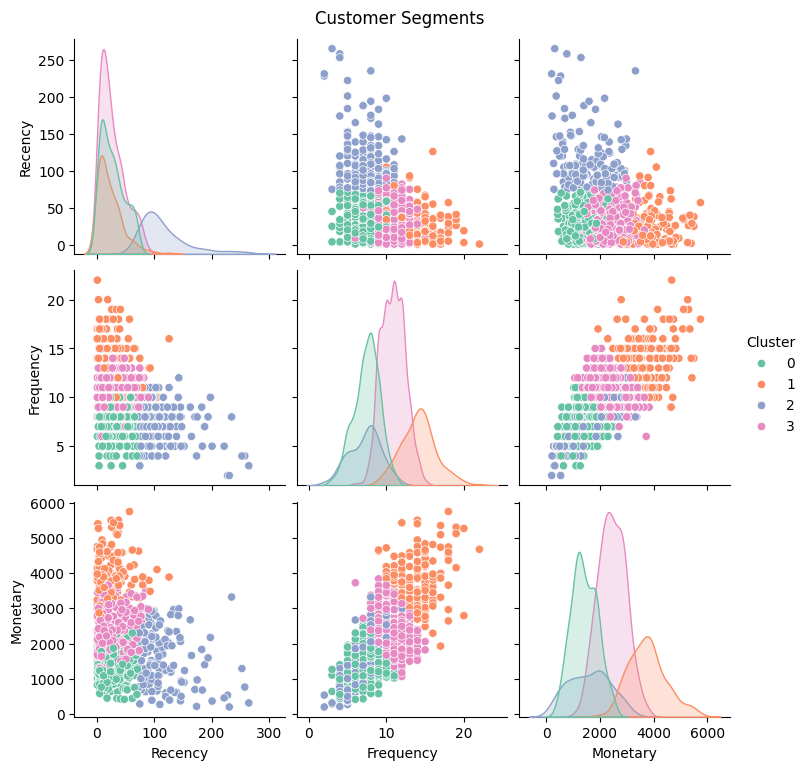

In [10]:
sns.pairplot(rfm.reset_index(), hue='Cluster', palette='Set2')
plt.suptitle("Customer Segments", y=1.02)
plt.show()